In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import nltk
nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df=pd.read_csv("/content/data.csv",encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
aa=df.groupby(["CustomerID"]).Country.nunique()
aa=aa.reset_index()
aa[aa["Country"]>1]

,CustomerID,Country
20,12370.0,2
38,12394.0,2
56,12417.0,2
60,12422.0,2
67,12429.0,2
69,12431.0,2
90,12455.0,2
92,12457.0,2


In [ ]:
print(f"The dataset has {df.shape[0]} and {df.shape[1]} columns")

The dataset has 541909 and 8 columns


In [ ]:
#looking for null values
pd.DataFrame(df.isnull().sum()).T

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,0,1454,0,0,0,135080,0


In [ ]:
#deleting null values 
df=df.dropna()
pd.DataFrame(df.isnull().sum()).T

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,0,0,0,0,0,0,0


In [ ]:
print("There are ", df.duplicated().sum()," duplicate values")
#Deleting duplicates 
df=df.drop_duplicates()
print("Existing duplicates after deleting: ",df.duplicated().sum())

There are  5225  duplicate values
Existing duplicates after deleting:  0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [ ]:
#changing invoice date from object type to datetime .
df_date = df['InvoiceDate'].str.split(" ", expand = True)
df['InvoiceDate'] = df_date[0]
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')

#changing customerID from float to int 
df["CustomerID"]=df["CustomerID"].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


In [ ]:
print(f"The resulting dataset 'df' has {df.shape[0]} and {df.shape[1]} columns")

The resulting dataset 'df' has 401604 and 8 columns


In [ ]:
#cancelled stocks
df[df["Quantity"]<0][:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01,0.29,17548,United Kingdom


In [ ]:
#since the data includes samples of cancelled stock as well , it is better to delete it.
cancelled_items=df[df["InvoiceNo"].str[0]=="C"]
print("There are ",cancelled_items.shape[0],"cancelled items in the dataset.")
cancelled_item_index=df[df["InvoiceNo"].str[0]=="C"].index
df.drop(cancelled_item_index,inplace=True)
print("After dropping it we have ",df.shape[0],"datas left in the dataset.")

There are  8872 cancelled items in the dataset.
After dropping it we have  392732 datas left in the dataset.


In [ ]:
#since invoice number gives us details about transactions only it wont make any difference if we delete it .
df.drop("InvoiceNo",axis=1,inplace=True)
df=df.reset_index(drop=True)
df.shape

(392732, 7)

In [ ]:
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom


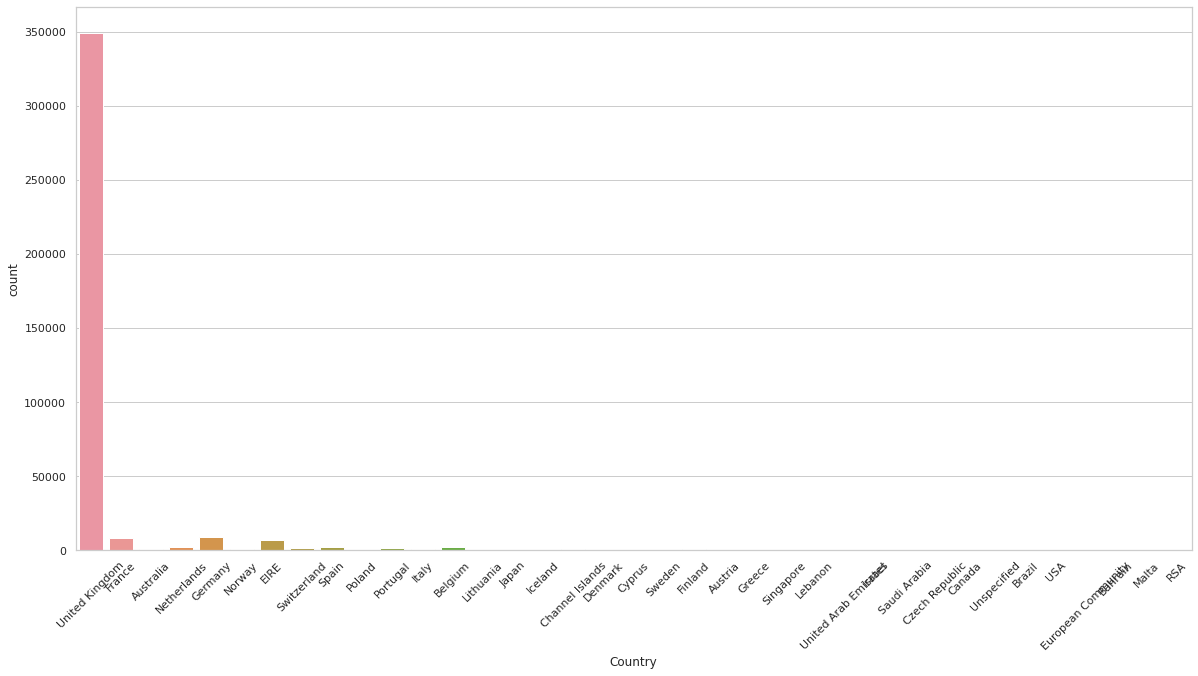

In [ ]:
#United kingdom has the most number of customers
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
chart=sns.countplot(x=df["Country"],orient="v")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
df[df["UnitPrice"]<0]

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
dff=pd.DataFrame()
dff['Description']=df['Description'] 
print("The description column alone contains ",dff.duplicated().sum(),"duplicate descriptions ")
dff=dff.drop_duplicates()
print("Dropping it leaves us with",dff.shape[0],"unique number of descriptions.")

The description column alone contains  388855 duplicate descriptions 
Dropping it leaves us with 3877 unique number of descriptions.


In [ ]:
#description dataset 
dff

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
383936,"LETTER ""W"" BLING KEY RING"
383938,"LETTER ""Z"" BLING KEY RING"
385708,PINK CRYSTAL SKULL PHONE CHARM
390177,CREAM HANGING HEART T-LIGHT HOLDER


**Preprocessing description data for NLP.**

1)Removing numerical values and punctuations.

In [ ]:
dff['description_processed'] = dff['Description'].str.replace("[^a-zA-Z]", " ")
dff[["Description",'description_processed']].sample(10)

,Description,description_processed
27301,VINTAGE WOODEN BAR STOOL,VINTAGE WOODEN BAR STOOL
2008,PINK/YELLOW FLOWERS HANDBAG,PINK YELLOW FLOWERS HANDBAG
1959,PARTY METAL SIGN,PARTY METAL SIGN
70083,FRENCH STYLE STORAGE JAR JAM,FRENCH STYLE STORAGE JAR JAM
69018,MOTHER'S KITCHEN SPOON REST,MOTHER S KITCHEN SPOON REST
817,SET OF 2 TINS JARDIN DE PROVENCE,SET OF TINS JARDIN DE PROVENCE
688,CERAMIC STRAWBERRY MONEY BOX,CERAMIC STRAWBERRY MONEY BOX
10623,SET OF 2 ROUND TINS CAMEMBERT,SET OF ROUND TINS CAMEMBERT
4273,FAIRY CAKE NOTEBOOK A5 SIZE,FAIRY CAKE NOTEBOOK A SIZE
4975,FRENCH ENAMEL UTENSIL HOLDER,FRENCH ENAMEL UTENSIL HOLDER


2)Changing to lowercase & deleting the short words.

In [ ]:
# It seems like the corpus normally consists of lowercase words.
dff['description_processed'] = [review.lower() for review in dff['description_processed']] 

dff['description_processed'] = dff['description_processed'].apply( lambda row:" ".join([word for word in row.split() if len(word)>2 ]))
dff[["Description",'description_processed']].sample(10)

,Description,description_processed
226869,HOME SWEET HOME CUSHION COVER,home sweet home cushion cover
27252,MULTICOLOUR EASTER RABBIT,multicolour easter rabbit
1059,12 PENCILS SMALL TUBE SKULL,pencils small tube skull
309,BIRD HOUSE HOT WATER BOTTLE,bird house hot water bottle
74495,CIRCUS PARADE BABY GIFT SET,circus parade baby gift set
113056,COTE D'AZURE NECKLACE,cote azure necklace
4350,DOORMAT NEIGHBOURHOOD WITCH,doormat neighbourhood witch
1299,RED FLOWER CROCHET FOOD COVER,red flower crochet food cover
2149,WHITE SPOT BLUE CERAMIC DRAWER KNOB,white spot blue ceramic drawer knob
1306,T-LIGHT GLASS FLUTED ANTIQUE,light glass fluted antique


3)Lemmatization

In [ ]:

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


dff['description_processed'] = dff['description_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


4)Removing stopwords.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

add_words = ['large','small','mini','set','design','red','purple','blue','pink','white','black','dark','pack','green','yellow','orange','rise','love','water','round','shape','square','oval','ivory','charm','polkadot','heart','home','sweet']

stop_words.extend(add_words)

def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

dff['description_processed'] = [remove_stopwords(r) for r in dff['description_processed']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Plotting

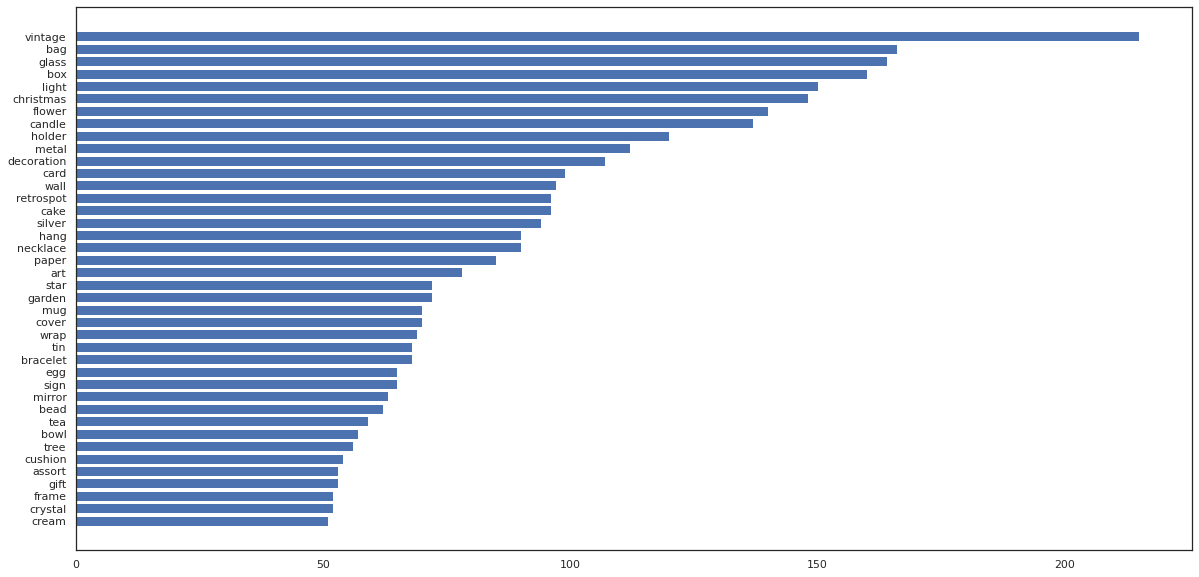

In [ ]:
## Plotting most frequent words

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data


#Extracts words into list and count frequency
all_words = ' '.join([text for text in dff['description_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 40) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,10))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

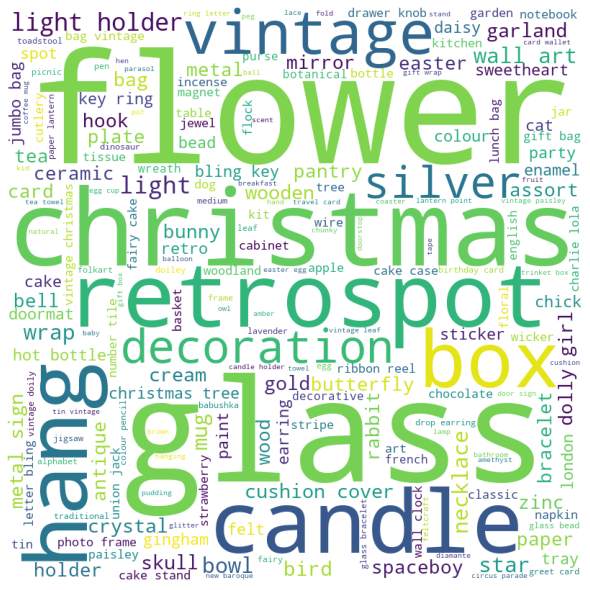

In [ ]:
## Bilding a Word Cloud

from wordcloud import WordCloud
all_words = ' '.join([text for text in dff['description_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

Creating bag of words - by Tfidf (Term Frequency inverse document frequency) method.

In [ ]:
# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(dff.description_processed)
features = tfidf.get_feature_names()
print("The bag of words contains ",len(features),"features")

The bag of words contains  1687 features


**CLUSTERING-1**

*Finding optimum K value by elbow method.*

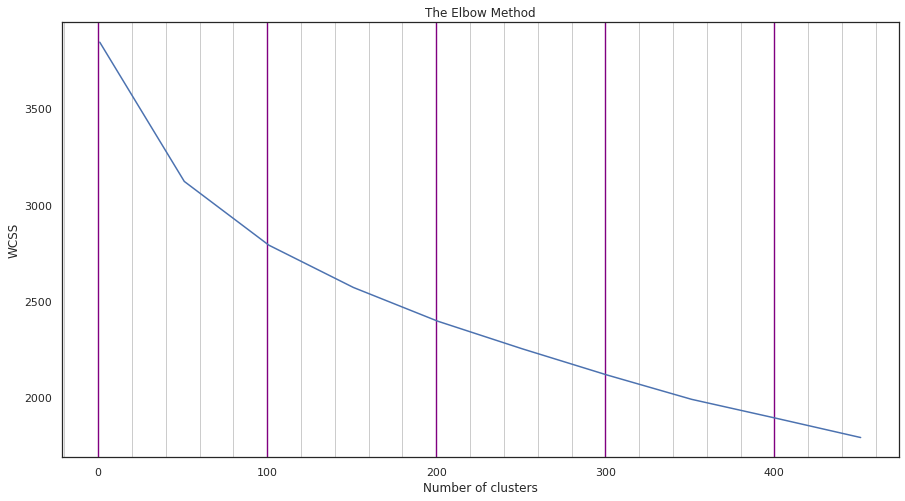

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,500,50):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

fig, ax= plt.subplots(figsize = (15, 8), facecolor = None) 
ax.plot(range(1,500,50),wcss)

ax.set_title('The Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')

plt.minorticks_on()
# plt.grid(True, 'major', color='k')
plt.grid(True, 'minor', 'x')

plt.grid(True, color = "purple", linewidth = "1.4",axis = 'x')
plt.show()


From the graph above there is a considerable change in the descent at the k value 50 and 100 (even though not obvious as 50).

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=50)
kmeans.fit(X)
clusters=kmeans.labels_
print("Cluster values for first 10 datapoints: ",clusters[:10])

Cluster values for first 10 datapoints:  [14 22  0 27  0 11 14  0  0 49]


In [ ]:
dff["cluster"]=clusters
dff[["Description",'description_processed',"cluster"]].head(10)

,Description,description_processed,cluster
0,WHITE HANGING HEART T-LIGHT HOLDER,hang light holder,14
1,WHITE METAL LANTERN,metal lantern,22
2,CREAM CUPID HEARTS COAT HANGER,cream cupid coat hanger,0
3,KNITTED UNION FLAG HOT WATER BOTTLE,knit union flag hot bottle,27
4,RED WOOLLY HOTTIE WHITE HEART.,woolly hottie,0
5,SET 7 BABUSHKA NESTING BOXES,babushka nesting box,11
6,GLASS STAR FROSTED T-LIGHT HOLDER,glass star frost light holder,14
7,HAND WARMER UNION JACK,hand warmer union jack,0
8,HAND WARMER RED POLKA DOT,hand warmer polka dot,0
9,ASSORTED COLOUR BIRD ORNAMENT,assort colour bird ornament,49


In [ ]:
# grp=df.groupby(["cluster_value"])["Description"].apply(list)
grp=dff.groupby(["cluster"])["description_processed"].apply(list)

#Representing each clusters
import random 
a,b,c,d,e=map(int,[random.randrange(1, 50, 1) for i in range(5)])
df_cluster=pd.DataFrame({f"cluster:{a}":grp[a][:6],f"cluster:{b}":grp[b][:6],f"cluster:{c}":grp[c][:6],f"cluster:{d}":grp[d][:6],f"cluster:{e}":grp[e][:6]})
df_cluster

,cluster:49,cluster:40,cluster:39,cluster:28,cluster:10
0,assort colour bird ornament,felt egg cosy chicken,travel sew kit,wood cabinet ant finish,traditional christmas ribbon
1,box assort colour teaspoon,felt egg cosy rabbit,travel first aid kit,wood board ant finish,scandinavian ribbon
2,party cone carnival assort,wire egg holder,travel card wallet flower meadow,organiser wood antique,romantic ribbon
3,party cone candy assort,cream sweetheart egg holder,travel card wallet pantry,wood letter,bright ribbon
4,assort colour case,egg fry pan,travel card wallet skull,daisy peg wood box,chocolate box ribbon
5,pen assort funny face,felt egg cosy rabbit,travel card wallet vintage,wood garden plant ladder,ribbon reel make snowman


In [ ]:
merged_data = df.merge(dff,left_on="Description",right_on="Description")
merged_data.sample(5)
#copying merged_data to data 
data=merged_data 

In [ ]:
#since stockcode alligns with description it may not make any difference by deleting it 
data.drop(["Description","description_processed","StockCode"],axis=1,inplace=True)

#As invoiceDate consists of only 2 years 2010 and 2011,the date is changed to month for better analysis.
data["Month"]=data["InvoiceDate"].dt.month
data.sample(5)

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster,Month
85589,8,2010-12-21,4.65,14135,United Kingdom,27,12
305028,2,2011-03-28,1.25,17238,United Kingdom,0,3
307456,4,2011-11-06,1.95,15427,United Kingdom,0,11
81466,2,2011-03-07,7.95,12614,Germany,49,3
366259,240,2011-07-12,1.45,15251,United Kingdom,0,7


In [ ]:
#creating new feature ie: totalprice from existing feature
data["Total_price"]=data["Quantity"]*data["UnitPrice"]
data.sample(10)

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster,Month,Total_price
158213,6,2011-10-11,2.95,12530,Germany,8,10,17.70
267487,2,2011-01-07,15.95,12489,France,26,1,31.90
219450,2,2011-01-26,16.95,16124,United Kingdom,41,1,33.90
281703,2,2011-05-19,1.65,14505,United Kingdom,31,5,3.30
31653,2,2011-09-04,0.55,16744,United Kingdom,24,9,1.10
346598,12,2011-10-03,1.45,15105,United Kingdom,0,10,17.40
335987,24,2011-11-29,1.79,12727,France,14,11,42.96
142595,4,2011-09-18,4.95,17858,United Kingdom,0,9,19.80
285111,1,2011-11-04,1.25,17203,United Kingdom,18,11,1.25
93573,12,2011-11-18,0.85,17159,United Kingdom,8,11,10.20


In [ ]:
#Dropping InvoiceDate along with Quantity and unit price as its product total_price remains as a new column.
data.drop(["InvoiceDate","Quantity","UnitPrice"],axis=1,inplace=True)
print("We have",len(data["Country"].unique())," unique countries , and the data set contains ",data.shape[0]," rows and ",data.shape[1]," columns.")
data.head()

We have 37  unique countries , and the data set contains  392732  rows and  5  columns.


,CustomerID,Country,cluster,Month,Total_price
0,17850,United Kingdom,14,12,15.3
1,17850,United Kingdom,14,12,15.3
2,17850,United Kingdom,14,12,15.3
3,17511,United Kingdom,14,12,163.2
4,13408,United Kingdom,14,12,81.6


*One hot encoding*

In [ ]:
#Grouping customerID based on country and taking its mode
country_df = data.groupby("CustomerID").agg({'Country':pd.Series.mode})
country_df.reset_index()
country_dummy=pd.get_dummies(country_df["Country"])
country_dummy=country_dummy.reset_index()
print(country_dummy.shape)
country_dummy.head()

(4339, 38)


,CustomerID,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,12346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,12347,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Column Month 
month_df=data[['CustomerID','Month']]
pd.get_dummies(month_df["Month"])
month_dummy= pd.get_dummies(month_df, columns = ['Month'])
month_dummy=month_dummy.groupby("CustomerID").agg("sum").astype(int)
month_dummy=month_dummy.reset_index()
print(month_dummy.shape)
month_dummy.head()

(4339, 13)


,CustomerID,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,12346,1,0,0,0,0,0,0,0,0,0,0,0
1,12347,29,0,0,24,0,18,0,22,0,47,0,42
2,12348,6,0,0,5,0,0,0,0,3,0,0,17
3,12349,0,0,0,0,0,0,0,0,0,0,73,0
4,12350,0,17,0,0,0,0,0,0,0,0,0,0


In [ ]:
#column cluster 
cluster_df=data[['CustomerID','cluster']]
pd.get_dummies(cluster_df["cluster"])
cluster_dummy= pd.get_dummies(cluster_df, columns = ['cluster']).astype(int)
cluster_dummy=cluster_dummy.groupby("CustomerID").agg("sum")
cluster_dummy=cluster_dummy.reset_index()
print(cluster_dummy.shape)
cluster_dummy.head()

(4339, 51)


,CustomerID,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,...,cluster_40,cluster_41,cluster_42,cluster_43,cluster_44,cluster_45,cluster_46,cluster_47,cluster_48,cluster_49
0,12346,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12347,55,0,0,23,1,1,5,0,0,...,0,18,0,0,0,0,0,4,0,3
2,12348,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349,26,0,0,1,0,1,9,0,0,...,0,0,6,1,0,0,2,1,0,1
4,12350,6,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#column Total_price
Total_price_df=data[['CustomerID','Total_price']]
Total_price=Total_price_df.groupby('CustomerID').agg("mean")
Total_price=Total_price.reset_index()
# print(Total_price.isnull().sum())
Total_price.head()

,CustomerID,Total_price
0,12346,77183.600000
1,12347,23.681319
2,12348,57.975484
3,12349,24.076027
4,12350,19.670588


In [ ]:
#Binning Total price
print(Total_price["Total_price"].describe())
Total_price['mean_price_binned'] = pd.cut(Total_price['Total_price'], [-1, 13, 18,25,772000], labels=[0,1,2,3])
Total_price.drop("Total_price",axis=1,inplace=True)
print(Total_price.shape)
Total_price.sample(5)

count     4339.000000
mean        68.334729
std       1467.744868
min          0.000000
25%         12.387560
50%         17.745568
75%         24.866214
max      77183.600000
Name: Total_price, dtype: float64
(4339, 2)


,CustomerID,mean_price_binned
942,13610,0
3604,17278,1
794,13404,2
1817,14823,0
2030,15118,3


In [ ]:
from functools import reduce
dummy_list=[country_dummy,month_dummy,cluster_dummy,Total_price]
final_data = reduce(lambda  left,right: pd.merge(left,right,on=['CustomerID'],
                                            how='outer'), dummy_list)
print("The resulting data set has ",final_data.shape[0]," rows and ",final_data.shape[1]," columns.")
final_data

The resulting data set has  4339  rows and  101  columns.


,CustomerID,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,...,cluster_41,cluster_42,cluster_43,cluster_44,cluster_45,cluster_46,cluster_47,cluster_48,cluster_49,mean_price_binned
0,12346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,12347,0,0,0,0,0,0,0,0,0,...,18,0,0,0,0,0,4,0,3,2
2,12348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,12349,0,0,0,0,0,0,0,0,0,...,0,6,1,0,0,2,1,0,1,2
4,12350,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,0,0,2
4335,18281,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4336,18282,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4337,18283,0,0,0,0,0,0,0,0,0,...,0,0,2,0,2,0,9,5,0,0


In [ ]:
data_1=final_data.copy()
data_1.drop("CustomerID",axis=1,inplace=True)
X1=data_1

**CLUSTERING-2**

Scaling for furthur clustering.

In [ ]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X1[1][:10]

array([-0.04559081, -0.04559081, -0.02147436, -0.07457877, -0.01518292,
       -0.03037634, -0.04559081, -0.03721185, -0.01518292, -0.04297847])

Elbow plot 

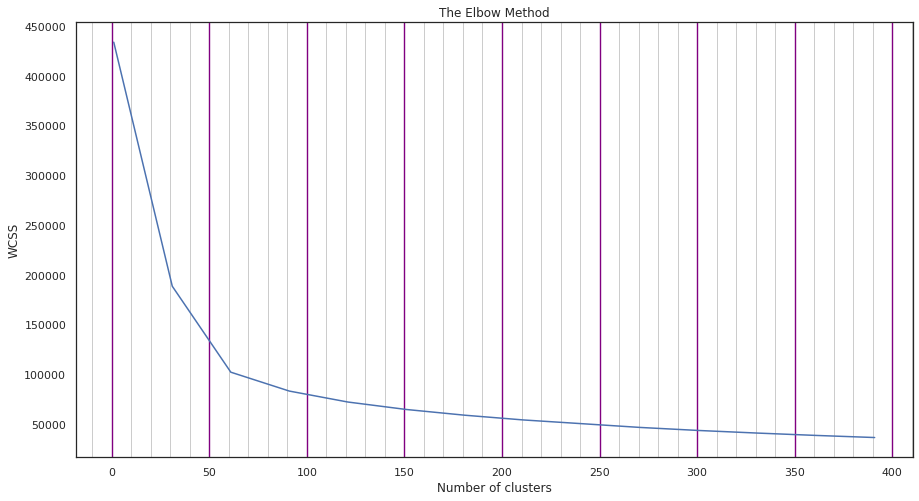

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,400,30):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
fig, ax= plt.subplots(figsize = (15, 8), facecolor = None) 
ax.plot(range(1,400,30),wcss)

ax.set_title('The Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')

plt.minorticks_on()
# plt.grid(True, 'major', color='k')
plt.grid(True, 'minor', 'x')

plt.grid(True, color = "purple", linewidth = "1.4",axis = 'x')
plt.show()


In [ ]:
# Clustering with k as 30
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=30)
kmeans.fit(X1)
customer_IDcluster=kmeans.labels_

final_data["cluster"]=customer_IDcluster
final_data.head()

,CustomerID,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,...,cluster_42,cluster_43,cluster_44,cluster_45,cluster_46,cluster_47,cluster_48,cluster_49,mean_price_binned,cluster
0,12346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,7
1,12347,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,3,2,24
2,12348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,7
3,12349,0,0,0,0,0,0,0,0,0,...,6,1,0,0,2,1,0,1,2,3
4,12350,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,22


In [ ]:
customer_cluster_data=final_data[["CustomerID","cluster"]]
customer_cluster_data

,CustomerID,cluster
0,12346,7
1,12347,24
2,12348,7
3,12349,3
4,12350,22
...,...,...
4334,18280,7
4335,18281,7
4336,18282,7
4337,18283,2


In [ ]:
op = df.merge(customer_cluster_data,left_on="CustomerID",right_on="CustomerID")
op.sample(10)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
38098,21154,RED RETROSPOT OVEN GLOVE,1,2011-08-28,1.25,18041,United Kingdom,2
259413,21181,PLEASE ONE PERSON METAL SIGN,12,2011-03-14,2.10,15671,United Kingdom,7
367109,22555,PLASTERS IN TIN STRONGMAN,5,2011-10-14,1.65,12856,United Kingdom,0
77070,22792,FLUTED ANTIQUE CANDLE HOLDER,12,2010-12-06,0.85,14748,United Kingdom,7
71164,22843,BISCUIT TIN VINTAGE GREEN,2,2010-12-05,6.75,12647,Germany,10
51638,23176,ABC TREASURE BOOK BOX,8,2011-03-14,2.25,12682,France,2
81908,22652,TRAVEL SEWING KIT,8,2010-12-06,1.65,13155,United Kingdom,7
371590,47590A,BLUE HAPPY BIRTHDAY BUNTING,2,2011-10-14,5.45,16413,United Kingdom,7
78043,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2011-02-09,1.25,15039,United Kingdom,5
277544,22960,JAM MAKING SET WITH JARS,6,2011-03-31,4.25,14890,United Kingdom,7


In [ ]:
#No of clusters in each groups 
cluster_costumer_no = op.groupby(["cluster"]).CustomerID.nunique()
cluster_costumer_no

cluster
0      755
1        1
2      175
3       14
4        1
5       18
6       19
7     3063
8       84
9        1
10      92
11       4
12       8
13       1
14       6
15      29
16       1
17      20
18       2
19       1
20       4
21       8
22      10
23       1
24       1
25       8
26       1
27       1
28       1
29       9
Name: CustomerID, dtype: int64